# NOTES

In [29]:
using Plots
using StatsBase
using Distributions
using StatsFuns
using KernelDensity
using Statistics
using StatsPlots
using CSV
using DataFrames
using Measures

In [2]:
function characteristics(X)
    l = length(X)
    Q2 = quantile!(X, 0.5)
    Q1 = quantile!(X, 0.25)
    Q3 = quantile!(X, 0.75)
    r = sort(X)[end] - sort(X)[1]
    IQR = Q3 - Q1
    σ2 = var(X)
    σ = sqrt(σ2)
    CV = σ/mean(X)
    println("Q2 = ", Q2)
    println("Q1 = ", Q1)
    println("Q3 = ", Q3)
    println("r = ", r)
    println("IQR = ", IQR)
    println("σ² = ", σ2)
    println("σ = ", σ)
    println("CV = ", CV)
end

function average(data, k, show=false)
    mean = sum(data)/length(data)
    harmonic = length(data)/sum(1 ./ data)
    geometric = prod(abs.(data).^(1/length(data)))
    cut = 1/(length(data) - 2*k) * sum(sort(data)[k+1:end-k])
    winsor = 1/length(data) * ( (k+1)*sort(data)[k+1] + sum(sort(data)[k+2:end-k-1]) + (k+1)*sort(data)[end-k] )
    
    if show
        println("Arytmetyczna: ", mean)
        println("Harmoniczna: ", harmonic)
        println("Geometryczna: ", geometric)
        println("Ucinana: ", cut)
        println("Winsorowska: ", winsor)
    end
    
    return([mean, harmonic, geometric, cut, winsor])
end

function correlation(X, Y)
    n = length(X)
    return ( sum(X .* Y) - n * mean(X) * mean(Y) ) / ( (n - 1) * std(X) * std(Y) )
end

correlation (generic function with 1 method)

In [8]:
data = CSV.read("weight-height.csv", DataFrame)
H = data[:,7] #.* 2.54
W = data[:,8] #.* 0.45359237

6292-element Vector{Float64}:
 84.0
 86.0
 95.0
 85.0
 88.0
 93.0
 84.0
 91.0
 85.0
 86.0
  ⋮
 88.0
 88.0
 82.0
 87.0
 95.0
 98.0
 88.0
 89.0
 95.0

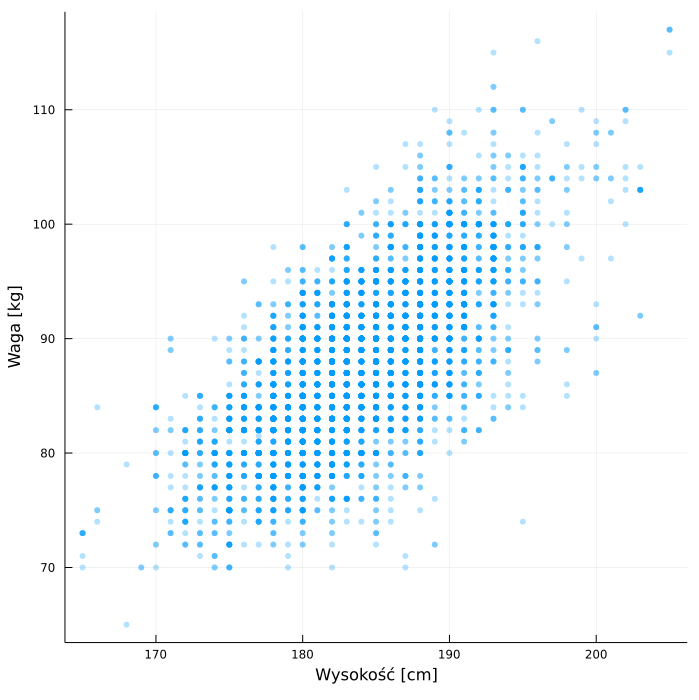

In [17]:
scatter(H, W, msize=4, mswidth=0, alpha=0.3, size=(700, 700), xlabel="Wysokość [cm]", ylabel="Waga [kg]", legend=false) |> display

savefig(plot!(dpi=500), "images/scatter")

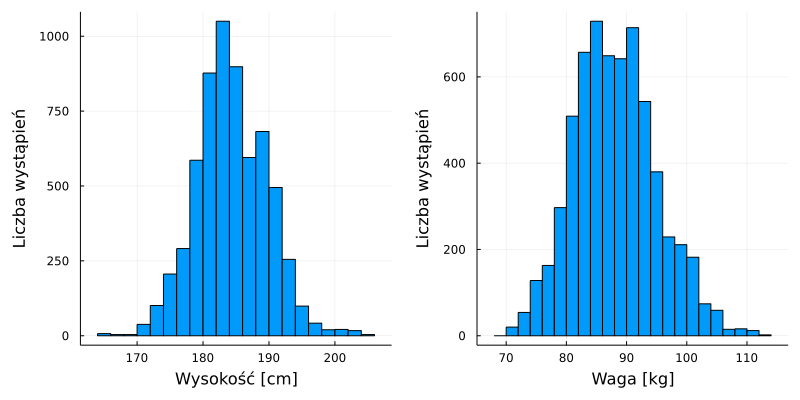

In [34]:
plt1 = histogram(H, bin=164:2:206, legend=false, xlabel="Wysokość [cm]", ylabel="Liczba wystąpień")
plt2 = histogram(W, bin=68:2:114, legend=false, xlabel="Waga [kg]", ylabel="Liczba wystąpień")
plot(plt1, plt2, layout=(1, 2), size=(800, 400), left_margin=5mm, bottom_margin=5mm) |> display
savefig(plot!(dpi=500), "images/histograms")

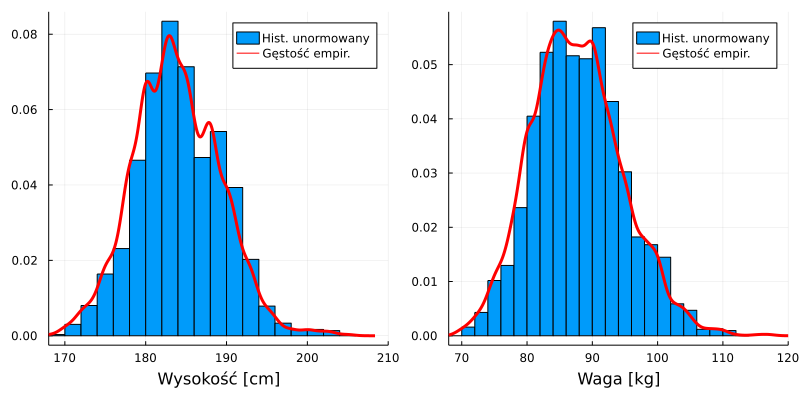

In [70]:
dens = kde(H)
histogram(H, bin=164:2:206, normed=true, label="Hist. unormowany")
plt1 = plot!(dens.x, dens.density, label="Gęstość empir.", width=3, color="red", xlabel="Wysokość [cm]", ylabel="", xlims=(168, 210))

dens = kde(W)
histogram(W, bin=68:2:114, normed=true, label="Hist. unormowany")
plt2 = plot!(dens.x, dens.density, label="Gęstość empir.", width=3, color="red", xlabel="Waga [kg]", ylabel="", xlims=(68, 120))

plot(plt1, plt2, layout=(1, 2), size=(800, 400), bottom_margin=5mm) |> display
savefig(plot!(dpi=500), "images/density")

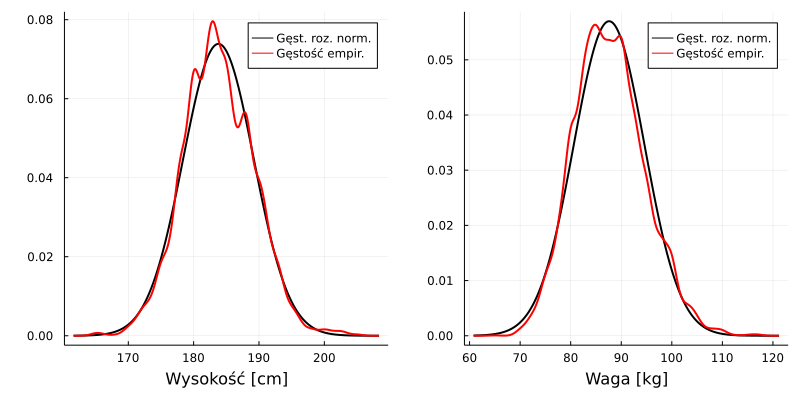

In [69]:
dens = kde(H)
plot(dens.x, pdf.(Normal(183.8, 5.4), dens.x), label="Gęst. roz. norm.", width=2, color="black")
plt1 = plot!(dens.x, dens.density, label="Gęstość empir.", width=2, color="red", xlabel="Wysokość [cm]", ylabel="")

dens = kde(W)
plot(dens.x, pdf.(Normal(87.6, 7), dens.x), label="Gęst. roz. norm.", width=2, color="black")
plt2 = plot!(dens.x, dens.density, label="Gęstość empir.", width=2, color="red", xlabel="Waga [kg]", ylabel="")

plot(plt1, plt2, layout=(1, 2), size=(800, 400), bottom_margin=5mm) |> display
savefig(plot!(dpi=500), "images/normal")

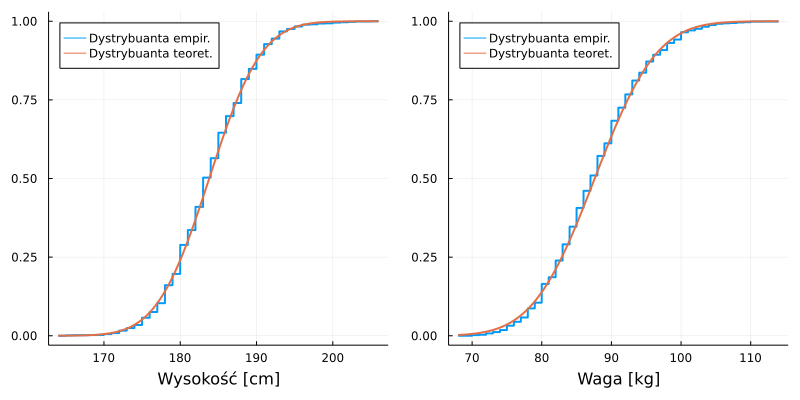

In [88]:
F = ecdf(H)
xs = 164:0.01:206
plot(xs, F.(xs), xlabel="Wysokość [cm]", label="Dystrybuanta empir.", legend=:topleft, width=2)
plt1 = plot!(xs, cdf.(Normal(183.8, 5.4), xs), width=2, label="Dystrybuanta teoret.")

F = ecdf(W)
xs = 68:0.01:114
plot(xs, F.(xs), xlabel="Waga [kg]", label="Dystrybuanta empir.", legend=:topleft, width=2)
plt2 = plot!(xs, cdf.(Normal(87.6, 7), xs), width=2, label="Dystrybuanta teoret.")

plot(plt1, plt2, layout=(1, 2), size=(800, 400), bottom_margin=5mm) |> display
savefig(plot!(dpi=500), "images/ecdf")

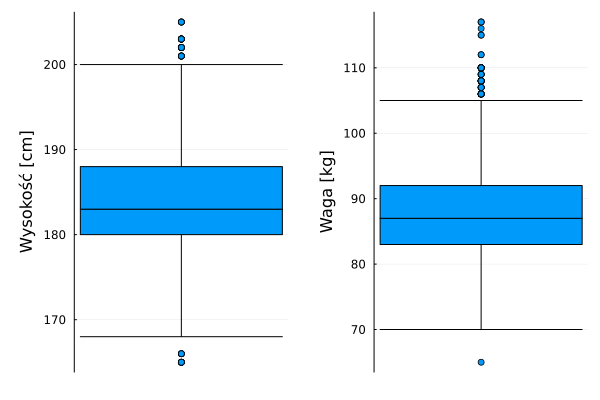

In [84]:
plt1 = boxplot(H, whisker_width=0.8, xaxis=false, xticks=false, legend=false, ylabel="Wysokość [cm]")

plt2 = boxplot(W, whisker_width=0.8, xaxis=false, xticks=false, legend=false, ylabel="Waga [kg]")

plot(plt1, plt2, layout=(1, 2), size=(600, 400), leftmargin=5mm, bottom_margin=5mm) |> display
savefig(plot!(dpi=500), "images/boxplot")

In [133]:
characteristics(H)
average(H, 0, true)

Q2 = 183.0
Q1 = 180.0
Q3 = 188.0
r = 40
IQR = 8.0
σ² = 28.98592384624378
σ = 5.3838577104381
CV = 0.02929010162542867
Arytmetyczna: 183.81150667514305
Harmoniczna: 183.6543461292946
Geometryczna: 183.7328508849403
Ucinana: 183.81150667514305
Winsorowska: 183.81150667514305


5-element Vector{Float64}:
 183.81150667514305
 183.6543461292946
 183.7328508849403
 183.81150667514305
 183.81150667514305

In [135]:
characteristics(W)
average(W, 0, true)

Q2 = 87.0
Q1 = 83.0
Q3 = 92.0
r = 52.0
IQR = 9.0
σ² = 48.495567860594186
σ = 6.963875922257245
CV = 0.0794766468616293
Arytmetyczna: 87.6216624284806
Harmoniczna: 87.07595663333463
Geometryczna: 87.34766504834259
Ucinana: 87.6216624284806
Winsorowska: 87.6216624284806


5-element Vector{Float64}:
 87.6216624284806
 87.07595663333463
 87.34766504834259
 87.6216624284806
 87.6216624284806

In [6]:
correlation(H, W)

0.6931104534750495

In [12]:
dane = DataFrame(wysokosc=H[100:140], waga=W[100:140])

CSV.write("dane.csv", dane)

"dane.csv"

In [15]:
length(H)

6292